# Шаблоны

Шаблон - выражение определённой формы, задающее правило, по которому про любое выражение можно сказать, соответствует ли оно этому шаблону или нет.

## Точные шаблоны

Это шаблоны, состоящие только из обычных выражений, и не используют собственно шаблонные конструкции. Т.е. любое обычное выражение может быть шаблоном, но это будет точный шаблон.

In [1]:
f[_]*g[_]

MatchQ[45, f[_]*g[_]]
MatchQ[f[2]*g[7], f[_]*g[_]]
MatchQ[f[2, 7]*g[7], f[_]*g[_]]
MatchQ[f[2, 7]*g[7], f[__]*g[_]] (* __ - любая послед. ненулевых выражений *)

f[_] g[_]
False
True
False
True

Проверить, соответствует ли выражение шаблону, можно с помощью функции MatchQ. Первым аргументом у неё должно стоять выражение, для которого проверяется соответствие шаблону, а вторым - сам шаблон. MatchQ выдаёт символ True, если выражение подходит под шаблон, и символ False в противном случае.

In [6]:
MatchQ[4*8, _]
MatchQ[f, _]

MatchQ[h[5], _[_]]
MatchQ[h[5], _]

True
True
True
True

In [10]:
MatchQ[2, 2]
MatchQ[2, 2.]
MatchQ[2, "2"]

True
False
False

In [13]:
2 === 2
f === _

True
False

## Универсальный шаблон: Blank

Кроме точных шаблонов есть специальные шаблонные выражения. Например, Blank[].
Любое выражение удовлетворяет этому шаблону.

In [15]:
FullForm[_]

Blank[]

In [16]:
MatchQ[a + b, _ + _]
_ + _ (* идентичные выражения *)

False
2 _

In [18]:
MatchQ[a + b, Hold[_ + _]]
MatchQ[a + b, HoldPattern[_ + _]] (* блокировка внутреннего вычисления *)

False
True

## Указание головы выражения в шаблоне

Шаблону удовлетворяет любое выражение с заданной головой.

In [20]:
MatchQ[Integer[I], _Integer]
FullForm[_Integer] 

True
Blank[Integer]

## Именованные шаблоны «name:»

Шаблоны можно локально именовать, чтобы использовать в дополнительных условиях шаблона и некоторых других связанных объектах (об этом ниже). Именование шаблона не меняет его сути.

In [22]:
MatchQ[a + b, x_ + y_]
FullForm[x_]

True
Pattern[x, Blank[]]

In [25]:
MatchQ[100, x_Integer /; x > 10]
MatchQ[9, x_Integer /; x > 10]

True
False

In [29]:
f[x_Integer]*g[y_Real] /; x > y

f[x: _Integer]*g[y: _Real] /; x > y

f[x_Integer] g[y_Real] /; x > y
f[x_Integer] g[y_Real] /; x > y

In [35]:
(x : (f[_Integer]*g[_Real])) * (y : 7 t)
FullForm[(x : (f[_Integer]*g[_Real])) * (y : 7 t)]

(x:f[_Integer] g[_Real]) (y:7 t)
Times[Pattern[x, Times[f[Blank[Integer]], g[Blank[Real]]]], Pattern[y, Times[7, t]]]

In [38]:
MatchQ[Range[3], x_List /; Length[x] == 3]
MatchQ[Range[3], {_, _, _}]

True
True

In [53]:
MatchQ[{"a", "b", "c"}, x : {__String} /; Length[x] == 3]
MatchQ[{"a", "b", "c"}, {Repeated[_String, {3}]}]

True
True

In [55]:
FullForm[__]

BlankSequence[]

In [56]:
PatternTest[]

PatternTest[]

In [65]:
OddQ[3]
MatchQ[3, x_ /; OddQ[x]]
MatchQ[3, Condition[x_, OddQ[x]]]

MatchQ[3, _?OddQ]

True
True
True
True

## Полный и краткий вид шаблонов

Как сложение, умножение и многие другие объекты в WM, шаблоны можно записать в кратком виде. В таблице ниже показаны краткие формы распространённых шаблонов и их полные формы. В дальнейшем мы почти всегда будем использовать краткие формы шаблонов. Если вам встретился непонятный шаблон, в первую очередь узнавайте его полную форму.

_                     Blank[]

x_                    Pattern[x, Blank[]]

_h                    Blank[h]

_?f                   PatternTest[Blank[], f]

x_?f                  PatternTest[Pattern[x, Blank[]], f]

x_ /; g[x] == 1       Condition[Pattern[x, Blank[]], Equal[g[x], 1]]

x:_h?f /; g[x] == 1   Condition[Pattern[x, PatternTest[Blank[h], f]], Equal[g[x], 1]]
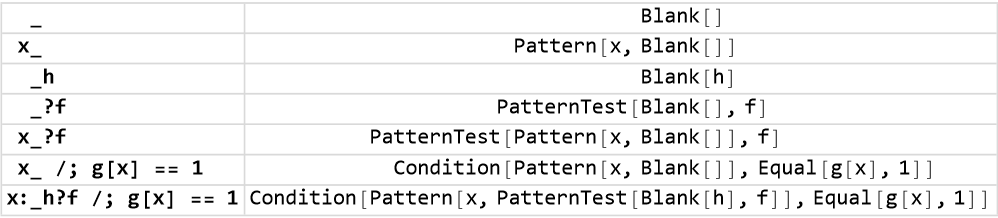

In [70]:
patterns = {_, x_, _h, _?f, x_?f, x_ /; g[x] == 1, 
   x : _h?f /; g[x] == 1};
Grid[
 {Style[StringDelete[ToString@#, "(" | ")"], "Input"], FullForm@#} & /@
   patterns,
 Alignment -> {{"_", "Blank[]"}},
 Frame -> All,
 FrameStyle -> LightGray
 ]